1.Number of Funding

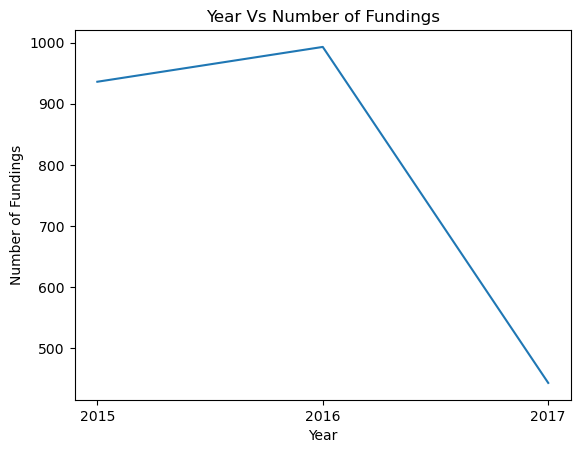

2015 936
2016 993
2017 443


In [7]:
import csv
import matplotlib.pyplot as plt

with open('startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)

    dct = {}
    for row in file_data:
        year = row['Date'][-4:]
        if year in dct:
            dct[year] += 1
        else:
            dct[year] = 1
            
    sorted_dct = dict(sorted(dct.items()))                                  
    plt.plot(list(sorted_dct.keys()), list(sorted_dct.values()))
    plt.xlabel("Year")
    plt.ylabel("Number of Fundings")
    plt.title('Year Vs Number of Fundings')
    plt.show()

    for i in sorted_dct.keys():
        print(i,end=" ")
        print(sorted_dct[i])


2.Top Indian Cities

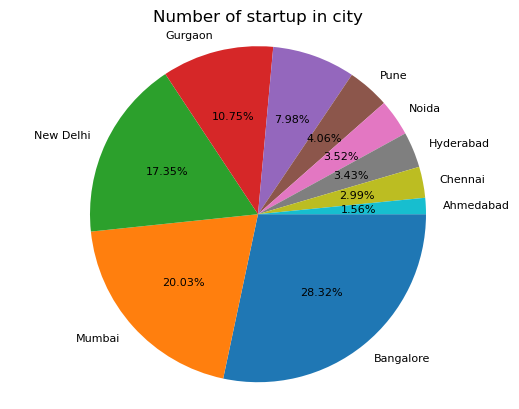

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
 179
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('startup_funding.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    df = pd.DataFrame(csv_reader, columns=header)

df.dropna(subset=["CityLocation"], inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df[df['CityLocation'] == 'bangalore'] = 'Bangalore'
df[df['CityLocation'] == 'Delhi'] = 'New Delhi'

city = df['CityLocation']
city = city.value_counts()[:10]
city_name = city.index
no_of_str = city.values

plt.pie(no_of_str, labels=city_name, autopct='%.2f%%', counterclock=False, textprops={'fontsize': 8})
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()

for i in range(city_name.shape[0]):
    print(city_name[i], no_of_str[i])


In [ ]:
3.Funding Amount

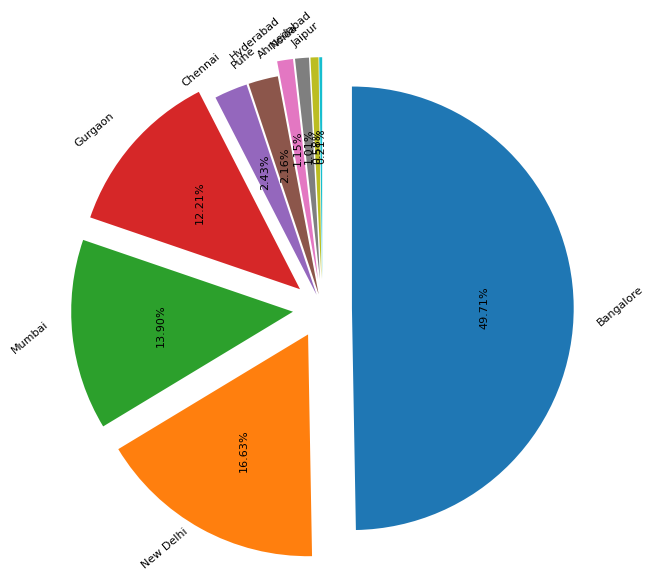

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=["CityLocation"], inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi", "New Delhi", inplace=True)
df['CityLocation'].replace("bangalore", "Bangalore", inplace=True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending=False)[0:10]
city = df.index
amount = df.values
explode = [0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(amount, labels=city, autopct='%0.2f%%', counterclock=False,
                                  startangle=90, explode=explode, radius=1.5,
                                  textprops=dict(size=8))  # Set the font size here

for text in texts:
    text.set_rotation(40)

for autotext in autotexts:
    autotext.set_rotation(90)

plt.show()

percent = np.true_divide(amount, amount.sum()) * 100
for i in range(len(city)):
    print(city[i], format(percent[i], '0.2f'))


4.Investment Type

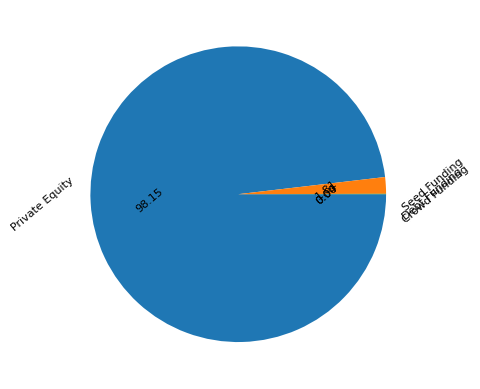

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'startup_funding.csv'
with open(csv_file_path, 'r') as file:
    df = pd.read_csv(file)

df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace=True)
df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace=True)
df['InvestmentType'].replace('DebtFunding', 'Debt Funding', inplace=True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending=False)[:10]
investment = df.index
amount = df.values

# Decrease font size in the pie chart and rotate text by 90 degrees
plt.pie(amount, labels=investment, autopct='%0.2f', counterclock=False, textprops={'fontsize': 8, 'rotation': 40})
plt.show()

percent = np.true_divide(amount, amount.sum()) * 100


plt.show()


5.Top Industries

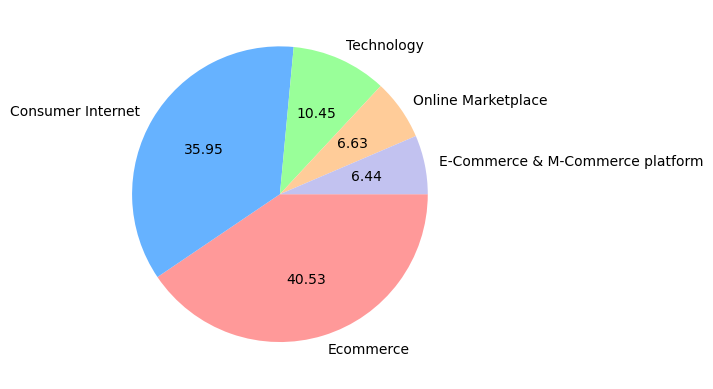

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df['IndustryVertical'].replace('ECommerce', 'Ecommerce', inplace=True)
df['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace=True)
df['IndustryVertical'].replace('ecommerce', 'Ecommerce', inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))
df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending=False)[:5]
industry = df.index
amount = df.values

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0']

plt.pie(amount, labels=industry, autopct='%0.2f', counterclock=False, colors=colors)

plt.show()

percent = np.true_divide(amount, amount.sum()) * 100
for i in range(len(industry)):
    print(industry[i], format(percent[i], '0.2f'))


In [ ]:
6

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
startup = df.index

for i in range(5):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [ ]:
7

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


In [ ]:
8

In [123]:
import pandas as pd

df = pd.read_csv('startup_funding.csv')

df['InvestorsName'].fillna("", inplace=True)

investors_name = []
for i in df['InvestorsName']:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())

investors_count = collections.Counter(investors_name)

for i, (investor, count) in enumerate(investors_count.most_common(10), 1):
    print(f"{i}. {investor}: {count}")

1. Sequoia Capital: 64
2. Accel Partners: 53
3. Kalaari Capital: 44
4. SAIF Partners: 41
5. Indian Angel Network: 40
6. Blume Ventures: 39
7. : 38
8. Undisclosed Investors: 33
9. Ratan Tata: 30
10. Undisclosed investors: 28
